# APOKASC figures


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [5]:
apokasc = pd.read_csv("APOKASC_cat_v7.0.1.txt", delim_whitespace=True)

In [6]:
apokasc

,KEPLER_ID,KEPLER_INT,2MASS_ID,LOC_ID,TELESCOPE,FIELD,RA,DEC,RA_PM,DEC_PM,...,OBS_QUART,DELTA_MAGNITUDE_16,PW_BINARY_P,PW_BINARY_E,PW_BINARY_K,CFOP,COLMAN,TARGFLAGS,ASPCAPFLAGS,APOKASC2_NOTE
0,10000151,10000151,2M19051857+4654038,5006,apo25m,K06_078+16,286.327395,46.901066,0.0,0.0,...,11111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE2_APOKASC,APOGEE2_ANCILLARY,APOGEE2_FAIN...",-9999,NaN
1,10000162,10000162,2M19052050+4655041,5006,apo25m,K06_078+16,286.335457,46.917831,0.0,0.0,...,11111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,T,F,APOGEE2_KOI,-9999,NaN
2,10000198,10000198,2M19052775+4658526,5006,apo25m,K06_078+16,286.365656,46.981289,0.0,0.0,...,11111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE2_APOKASC,APOGEE2_ANCILLARY,APOGEE2_FAIN...",-9999,NaN
3,10000207,10000207,2M19052985+4654372,4405,apo25m,K06_078+16,286.374415,46.910336,0.0,0.0,...,111111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE_ANCILLARY,APOGEE_KEPLER_SEISMO",...,NaN
4,10000490,10000490,2M19061343+4657264,5006,apo25m,K06_078+16,286.555994,46.957340,0.0,0.0,...,111111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,T,F,APOGEE2_KOI,"C_M_WARN,N_M_WARN,VSINI_WARN",-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24005,9995937,9995937,2M18553632+4659372,5003,apo25m,K03_077+20,283.901366,46.993679,0.0,0.0,...,111111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE2_APOKASC_DWARF,APOGEE2_APOKASC","VMICRO_WARN,N_M_WARN",-9999
24006,9996021,9996021,2M18554840+4657318,5003,apo25m,K03_077+20,283.951707,46.958843,0.0,0.0,...,111111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE2_APOKASC_DWARF,APOGEE2_APOKASC","VMICRO_WARN,VSINI_WARN",-9999
24007,9996342,9996342,2M18563273+4658576,5003,apo25m,K03_077+20,284.136391,46.982693,0.0,0.0,...,110000000000000000,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE2_APOKASC_GIANT,APOGEE2_APOKASC",-9999,NaN
24008,9996347,9996347,2M18563433+4657134,5003,apo25m,K03_077+20,284.143083,46.953739,0.0,0.0,...,111111111111111111,-9999.0,-9999.0000,-9999.000000,-9999.000000,F,F,"APOGEE2_APOKASC_DWARF,APOGEE2_APOKASC",VMICRO_WARN,-9999


In [143]:
CN = apokasc['DR17_C_FE'] - apokasc['DR17_N_FE']
Mseis = apokasc['APOKASC3P_MASS']
MH = apokasc['DR17_M_H_COR']
m = (CN > -.5) & (Mseis > 0) & (Mseis < 2.5) & (np.abs(MH + 0.21) < .1) & (apokasc['HON_EVSTATES'] == 0)

In [174]:
bacchus = fits.getdata("/data/Misc/dr17_nc_abund_v2_0.fits")

df = pd.DataFrame({_: np.array(bacchus[_]).byteswap().newbyteorder() for _ in ['APOGEE_ID', 'C12C13', 'C12C13_ERR_MEAS', 'C12C13_ERR_EMP']})
merged = pd.merge(df, apokasc, left_on='APOGEE_ID', right_on='2MASS_ID')

C12C13 = merged['C12C13']
Mseis_C12 = merged['APOKASC3P_MASS']
e_x = merged['APOKASC3P_MASS_ERR']
e_y = merged['C12C13_ERR_MEAS']
MH = merged['DR17_M_H_COR']
m_C12 = (Mseis_C12 > 0) & (Mseis_C12 < 2.5) & (np.abs(MH + 0.21) < .1) & (merged['HON_EVSTATES'] == 0)

In [177]:
# k = bacchus[bacchus['APOGEE_ID'] == '2M05592585-5911542']
k = bacchus[bacchus['C12C13'] == 9.55400]
{_: k[_][0] for _ in bacchus.columns.names}

{'APOGEE_ID': '2M01324485+7357384',
 'FIELD': '125+12',
 'TELESCOPE': 'apo25m',
 'EXTRATARG': 0,
 'SNR': 521.9255,
 'TEFF': 3763.3374,
 'LOGG': 0.7169271,
 'M_H': -0.41802,
 'ALPHA_M': 0.071127996,
 'FE_H': -0.43772,
 'VMICRO': 1.94535,
 'CONVOL': 15.76,
 'UPDATE_C': 2,
 'UPDATE_N': 2,
 'UPDATE_O': 2,
 'C_FE': 0.08405334,
 'C_FE_ERR_MEAS': 0.014139114,
 'C_FE_ERR_EMP': 0.020329764,
 'C_FE_LIM': nan,
 'C_N_LINES': 9,
 'C_METHOD_ABUND': array([[8.048, 8.008, 8.049, 8.048, 8.022],
        [8.065, 8.057, 8.059, 8.045, 8.054],
        [8.032, 8.015, 8.054, 8.064, 8.114],
        [7.985, 7.927, 7.767, 8.005, 8.013],
        [8.651, 8.372, 8.744, 8.485, 8.672],
        [8.026, 7.935, 7.976, 8.037, 8.014],
        [8.04 , 8.021, 8.011, 8.036, 8.021],
        [8.045, 8.024, 7.991, 8.029, 7.992],
        [7.92 , 7.837, 8.128, 8.009, 7.82 ],
        [8.102, 8.019, 7.975, 8.046, 8.039],
        [8.024, 7.944, 8.023, 8.023, 7.998],
        [8.027, 7.986, 8.07 , 8.039, 8.085],
        [  nan,   nan,

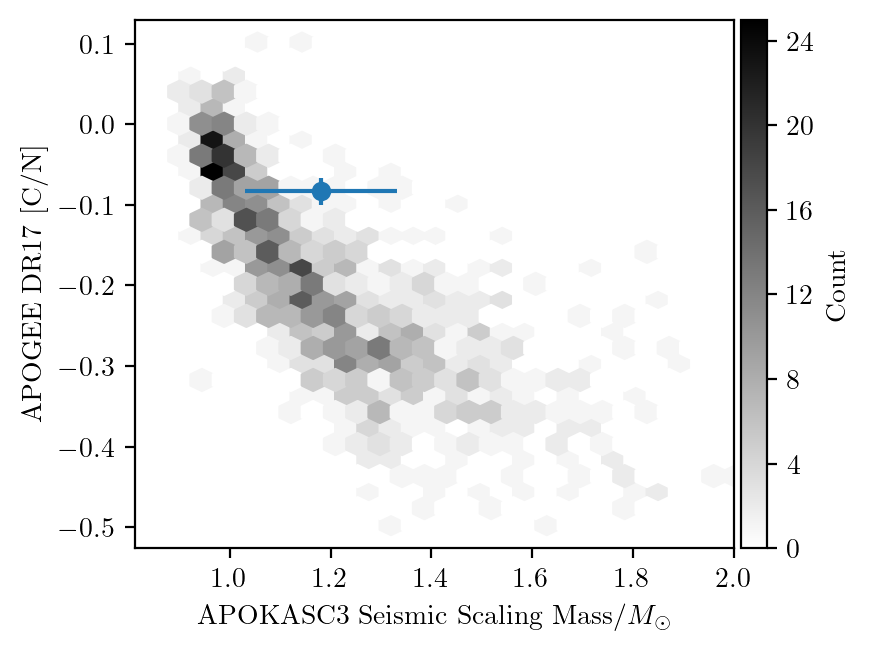

In [223]:
# f, ax = plt.subplots(2, 1, sharex=True)
# plt.sca(ax[0])

from matplotlib import cm

plt.hexbin(Mseis[m], CN[m], gridsize=(30,15), mincnt=0, cmap='gray_r')
plt.errorbar(1.181, -0.083321, xerr=0.151, yerr=0.017, fmt='o')
plt.ylabel(r"APOGEE DR17 [C/N]")

# plt.sca(ax[1])

# # plt.hexbin(Mseis_C12[m_C12], C12C13[m_C12], gridsize=30, cmap='gray_r')
# plt.errorbar(Mseis_C12[m_C12], C12C13[m_C12], xerr=e_x[m_C12], yerr=e_y[m_C12], c='gray', fmt='.')

# plt.ylabel(r"APOGEE DR17 $[\mathrm{C}{^{12}}/\mathrm{C}{^{13}}]$")
plt.xlabel(r"APOKASC3 Seismic Scaling Mass/$M_\odot$")
plt.colorbar(label='Count', pad=.01, ticks=np.arange(0,28,4))

plt.tight_layout()
plt.xlim(None, 2)
plt.gcf().set_size_inches(4,3)

plt.savefig("CN.pdf", bbox_inches='tight', transparent=True)
plt.show()

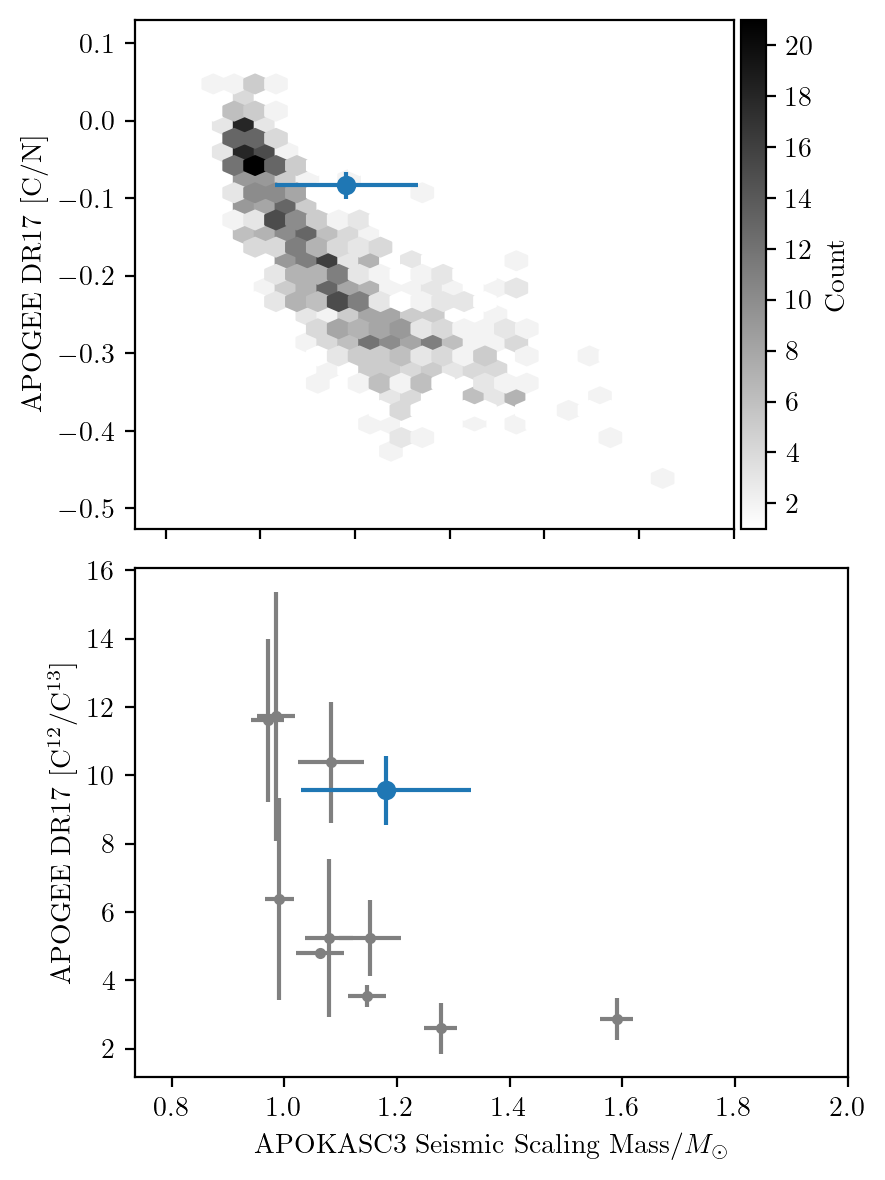

In [200]:
f, ax = plt.subplots(2, 1, sharex=True)
plt.sca(ax[0])

from matplotlib import cm

plt.hexbin(Mseis[m], CN[m], gridsize=30, mincnt=1, cmap='gray_r')
plt.errorbar(1.181, -0.083321, xerr=0.151, yerr=0.017, fmt='o')
plt.ylabel(r"APOGEE DR17 [C/N]")
plt.colorbar(label='Count', pad=.01, ticks=np.arange(0,22,2))

plt.sca(ax[1])

# plt.hexbin(Mseis_C12[m_C12], C12C13[m_C12], gridsize=30, cmap='gray_r')
plt.errorbar(Mseis_C12[m_C12], C12C13[m_C12], xerr=e_x[m_C12], yerr=e_y[m_C12], c='gray', fmt='.')
plt.errorbar(1.181, 9.554, xerr=0.151, yerr=1, fmt='o')
plt.ylabel(r"APOGEE DR17 $[\mathrm{C}{^{12}}/\mathrm{C}{^{13}}]$")
plt.xlabel(r"APOKASC3 Seismic Scaling Mass/$M_\odot$")


plt.tight_layout()
plt.xlim(None, 2)
plt.gcf().set_size_inches(4,6)

plt.savefig("CN.pdf", bbox_inches='tight', transparent=True)
plt.show()